In [1]:
import data_preparation as dp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import cv2 as cv
from layers import Conv, ReLU, MaxPool, Flatten, Dense, MSELoss
import model
import main

In [2]:
X_train, Y_train, X_test, Y_test, X_val, Y_val = dp.load_data(img_width=320, img_height=200)

Data loaded.


In [3]:
X = X_train[0:2]
Y = Y_train[0:2]

In [4]:
model = model.CNN()

Convolutional Neural Network initialized.


In [5]:
model.add_layer(Conv(8, 3, 1))
model.add_layer(ReLU())
model.add_layer(MaxPool(2))
model.add_layer(Conv(16, 3, 8))
model.add_layer(ReLU())
model.add_layer(MaxPool(2))
model.add_layer(Flatten())
model.add_layer(Dense(59904, 4))

In [6]:
model.print_model_structure()

Model structure:
1. Conv(kernels=8, filter_size=3, channels=1)
2. ReLU()
3. MaxPool(filter_size=2)
4. Conv(kernels=16, filter_size=3, channels=8)
5. ReLU()
6. MaxPool(filter_size=2)
7. Flatten()
8. Dense(input_size=59904, output_size=4)


In [7]:
loss_fn = MSELoss()

In [8]:
loss_per_epochs = model.train(X, Y, 16, loss_fn, 20, 0.01)

Training process...
Epoch 1/20, Loss: 0.4047
Epoch 2/20, Loss: 3.1874
Epoch 3/20, Loss: 1.3970
Epoch 4/20, Loss: 0.3923
Epoch 5/20, Loss: 0.3193
Epoch 6/20, Loss: 0.1795
Epoch 7/20, Loss: 0.1125
Epoch 8/20, Loss: 0.0916
Epoch 9/20, Loss: 0.0794
Epoch 10/20, Loss: 0.0668
Epoch 11/20, Loss: 0.0545
Epoch 12/20, Loss: 0.0423
Epoch 13/20, Loss: 0.0322
Epoch 14/20, Loss: 0.0266
Epoch 15/20, Loss: 0.0206
Epoch 16/20, Loss: 0.0158
Epoch 17/20, Loss: 0.0125
Epoch 18/20, Loss: 0.0116
Epoch 19/20, Loss: 0.0096
Epoch 20/20, Loss: 0.0082


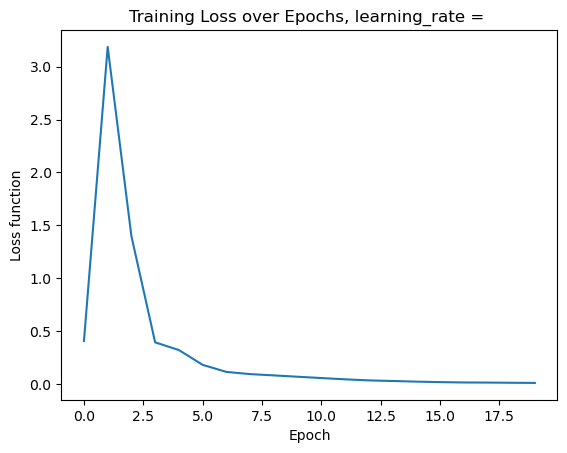

In [9]:
model.plot_loss_for_learning(loss_per_epochs)